In [1]:
import pandas as pd
from pandas_datareader import data
import seaborn as sns
%matplotlib inline

### Visualizing stock data

In [2]:
stock_data = data.DataReader(name="BAJAJFINSV.NS", data_source="yahoo")
stock_data.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-06-05,4343.450195,4298.000000,4339.000000,4304.750000,57413.0,4296.828125
2017-06-06,4340.049805,4176.000000,4340.000000,4244.100098,92133.0,4236.289551
2017-06-07,4280.000000,4181.200195,4274.950195,4254.149902,94267.0,4246.321289
2017-06-08,4310.000000,4236.000000,4278.600098,4280.000000,58681.0,4272.123535
2017-06-09,4299.000000,4190.899902,4299.000000,4242.200195,104304.0,4234.393555


<AxesSubplot:xlabel='Date'>

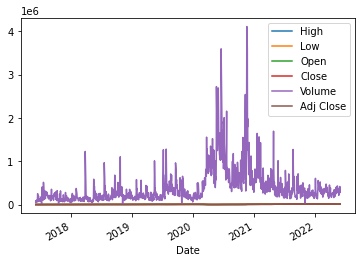

In [3]:
# Applying plot on entire data frame
stock_data.plot()

<AxesSubplot:xlabel='Date'>

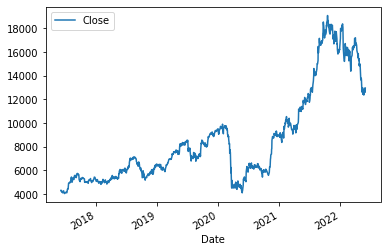

In [4]:
# Applying on perticular column
stock_data.plot(y="Close")

<AxesSubplot:xlabel='Date'>

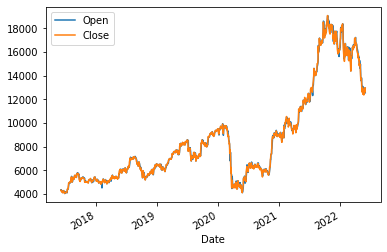

In [5]:
# Selecting multiple columns
# stock_data.plot(y=["Open", "Close"])
stock_data[["Open", "Close"]].plot()

### Modifying plot aesthetics using plt.style

In [6]:
stock_data = data.DataReader(name="BAJAJFINSV.NS", data_source="yahoo")
stock_data.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-06-05,4343.450195,4298.000000,4339.000000,4304.750000,57413.0,4296.828125
2017-06-06,4340.049805,4176.000000,4340.000000,4244.100098,92133.0,4236.290039
2017-06-07,4280.000000,4181.200195,4274.950195,4254.149902,94267.0,4246.321777
2017-06-08,4310.000000,4236.000000,4278.600098,4280.000000,58681.0,4272.123535
2017-06-09,4299.000000,4190.899902,4299.000000,4242.200195,104304.0,4234.393555


In [7]:
import matplotlib.pyplot as plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<AxesSubplot:xlabel='Date'>

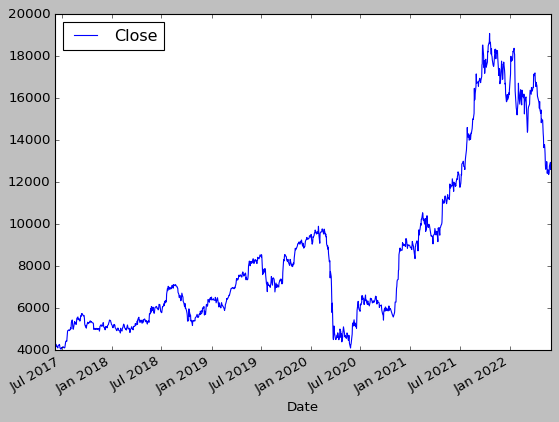

In [8]:
plt.style.use("classic")
stock_data.plot(y="Close")

<AxesSubplot:xlabel='Date'>

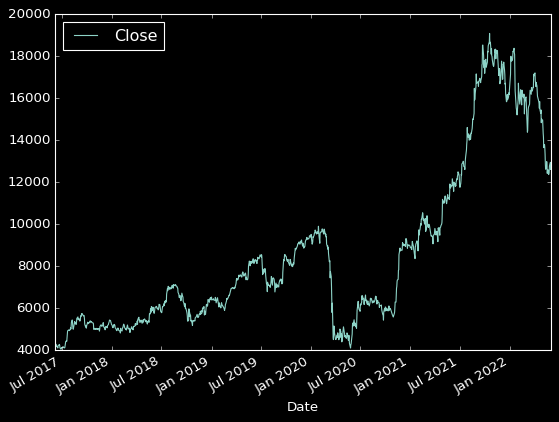

In [9]:
plt.style.use("dark_background")
stock_data.plot(y="Close")

<AxesSubplot:xlabel='Date'>

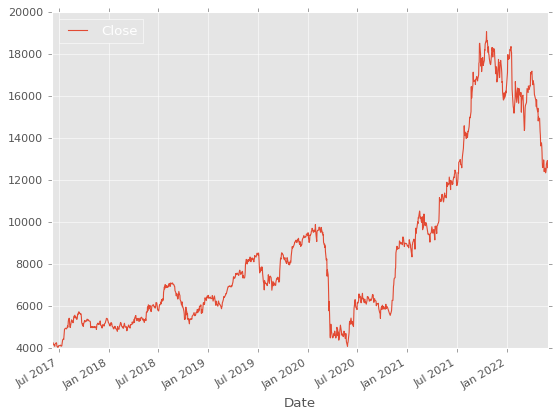

In [10]:
plt.style.use("ggplot")
stock_data.plot(y="Close")

<AxesSubplot:ylabel='Date'>

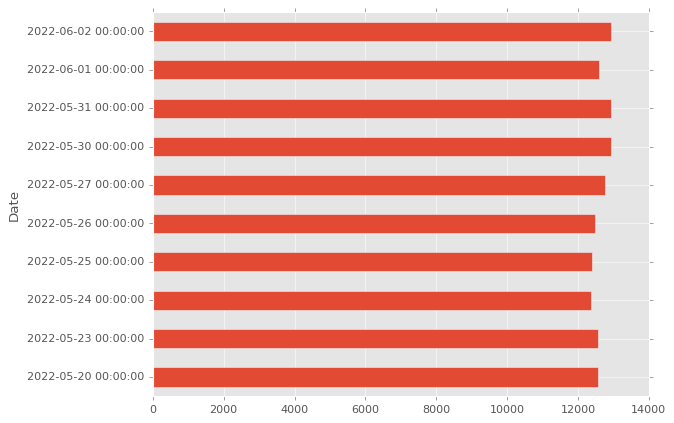

In [11]:
stock_data.tail(10)["Close"].plot(kind="barh")

In [12]:
mean = stock_data['Close'].mean()

In [13]:
def stock_performance(stock_price):
    if stock_price >= mean:
        return "Good"
    elif stock_price < mean:
        return "Bad"

In [14]:
stock = stock_data["Close"].apply(stock_performance).value_counts()
stock

Bad     771
Good    464
Name: Close, dtype: int64

<AxesSubplot:ylabel='Close'>

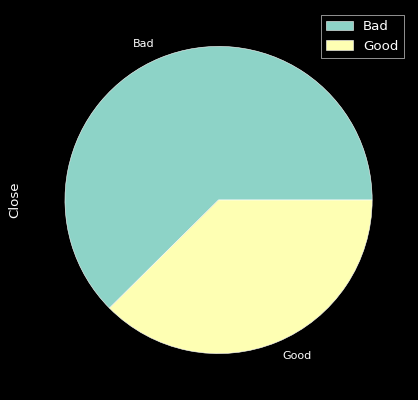

In [15]:
plt.style.use("dark_background")
stock.plot(kind="pie", legend=True)

<AxesSubplot:xlabel='Date'>

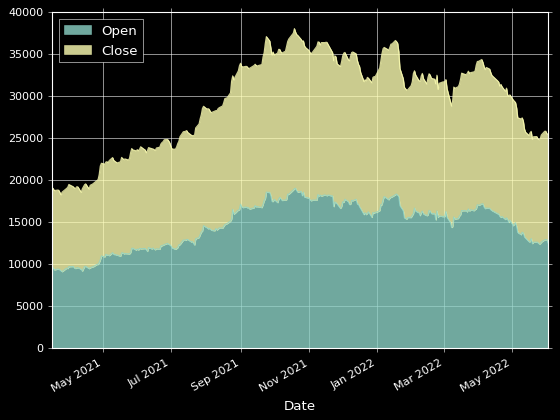

In [16]:
stock_data[['Open', 'Close']].iloc[-300:].plot.area(alpha=0.8)

<AxesSubplot:xlabel='Date'>

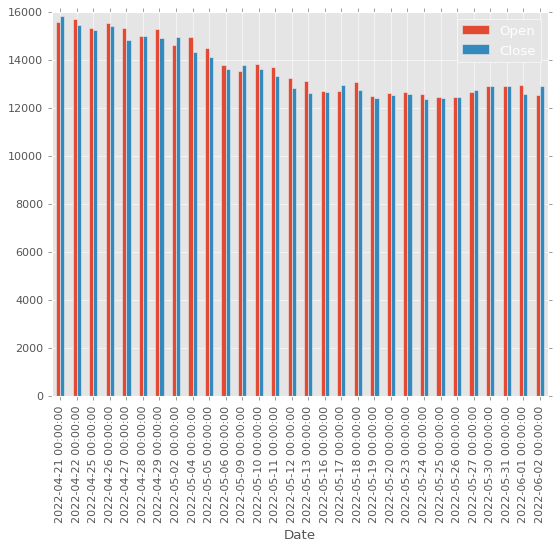

In [17]:
plt.style.use("ggplot")
stock_data[['Open', 'Close']].iloc[-30:].plot.bar()

<AxesSubplot:xlabel='Date'>

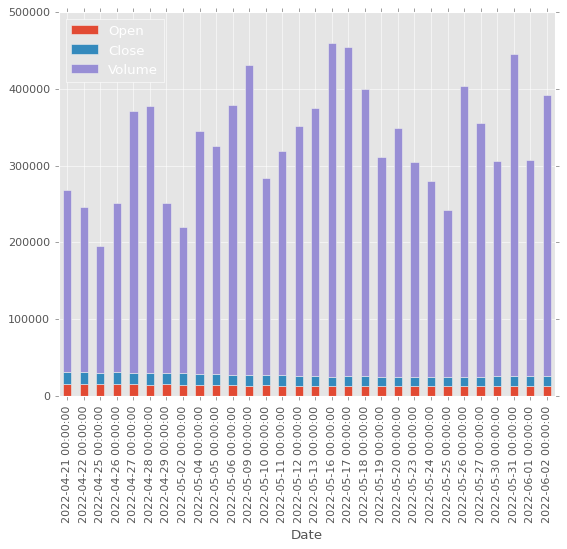

In [18]:
stock_data[['Open', 'Close', 'Volume']].iloc[-30:].plot.bar(stacked=True)

<AxesSubplot:ylabel='Frequency'>

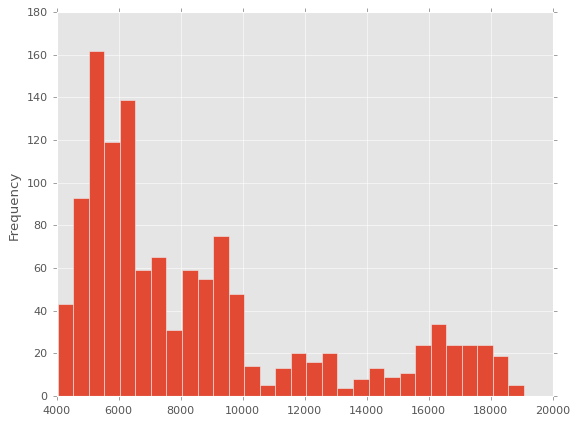

In [21]:
# We can see where stock lied most of the time
stock_data['Close'].plot.hist(bins=30)

<AxesSubplot:xlabel='Date'>

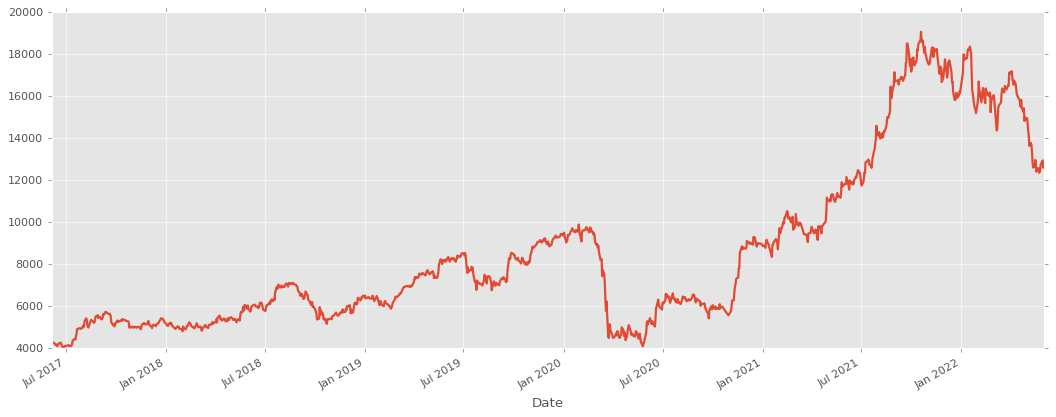

In [32]:
stock_data['Close'].plot.line(figsize=(16, 6), lw=2)

<AxesSubplot:xlabel='Close', ylabel='date'>

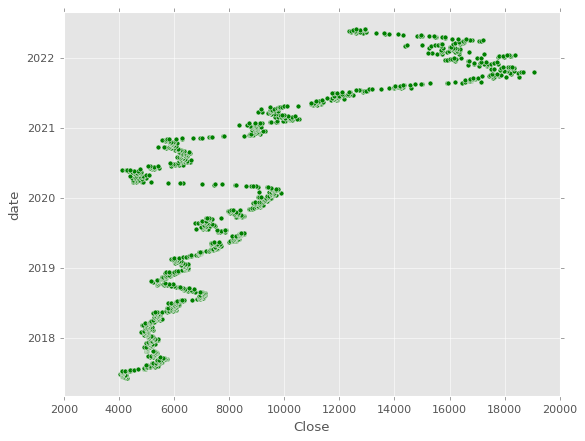

In [60]:
stock_data['date'] = pd.to_datetime(stock_data.index)
stock_data.plot.scatter(x='Close', y="date", c="g")

In [61]:
stock_data.index

DatetimeIndex(['2017-06-05', '2017-06-06', '2017-06-07', '2017-06-08',
               '2017-06-09', '2017-06-12', '2017-06-13', '2017-06-14',
               '2017-06-15', '2017-06-16',
               ...
               '2022-05-20', '2022-05-23', '2022-05-24', '2022-05-25',
               '2022-05-26', '2022-05-27', '2022-05-30', '2022-05-31',
               '2022-06-01', '2022-06-02'],
              dtype='datetime64[ns]', name='Date', length=1235, freq=None)

<AxesSubplot:xlabel='Close', ylabel='Volume'>

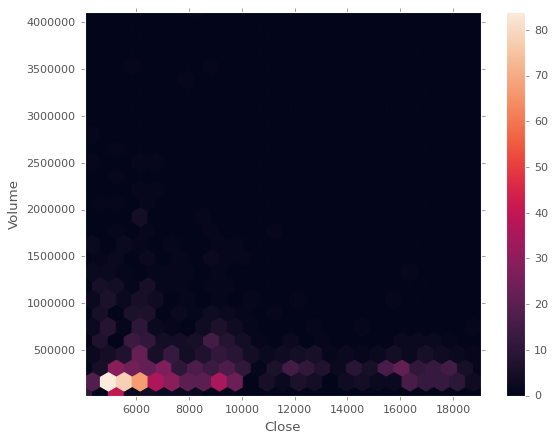

In [70]:
stock_data.plot.hexbin(x='Close', y='Volume', gridsize=25, cmap="rocket")

<AxesSubplot:ylabel='Density'>

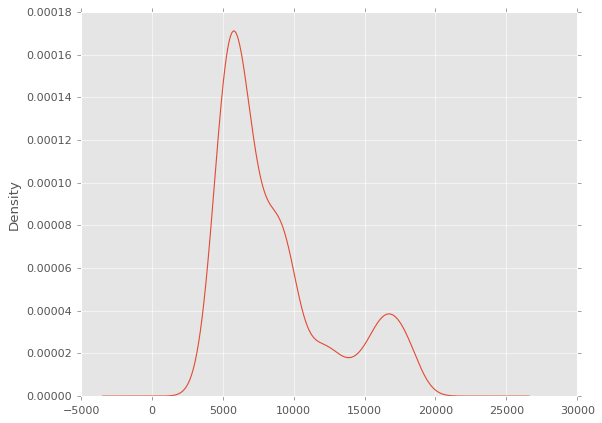

In [73]:
stock_data['Close'].plot.kde()